<a href="https://colab.research.google.com/github/bhoomi1310/Data-Science-Project-on-Cervical-Cancer-Detection/blob/main/Cervical_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import preprocessing

from sklearn.model_selection import KFold

import seaborn as sns; sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading the data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/risk_factors_cervical_cancer.csv',na_values="?")

In [4]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


## **Exploratory Data Analysis**

In [5]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(858, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

## **Plotting Graphs**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda8b99c190>]],
      dtype=object)

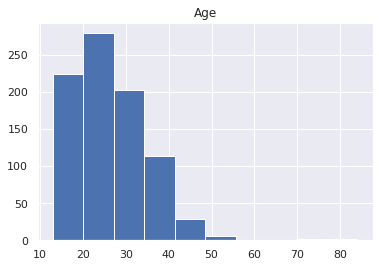

In [8]:
df.hist("Age")

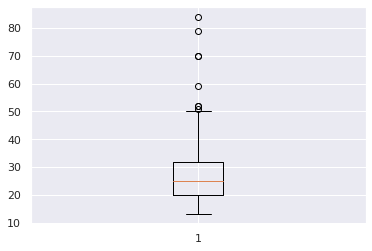

In [9]:
plt.boxplot(df["Age"])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda8b3b2510>]],
      dtype=object)

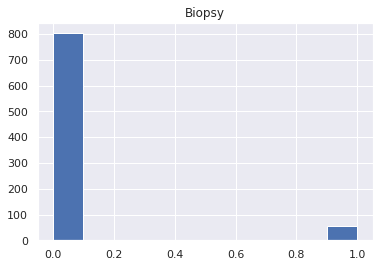

In [10]:
df.hist("Biopsy")

In [11]:
df.groupby(["Biopsy"]).size()

Biopsy
0    803
1     55
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda8b343d50>]],
      dtype=object)

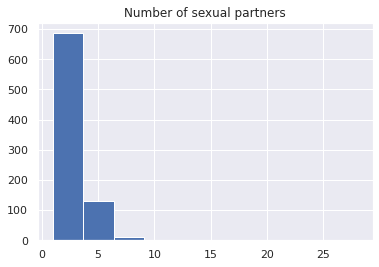

In [12]:
df.hist("Number of sexual partners")

### **Sum of all null values present in the dataset**

In [13]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
mis_val = df.isnull().sum()
mis_val_percent = (100 * df.isnull().sum() / len(df)).round(1)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table = mis_val_table.rename(columns = {0 : 'Missing', 1 : 'Proportion in %'})

mis_val_table

,Missing,Proportion in %
Age,0,0.0
Number of sexual partners,0,0.0
First sexual intercourse,0,0.0
Num of pregnancies,0,0.0
Smokes,0,0.0
Smokes (years),0,0.0
Smokes (packs/year),0,0.0
Hormonal Contraceptives,0,0.0
Hormonal Contraceptives (years),0,0.0
IUD,0,0.0


In [ ]:
df["STDs: Number of diagnosis"].sum()

75

In [ ]:
df["Number of sexual partners"].median()

2.0

In [ ]:
df["Number of sexual partners"].fillna(df["Number of sexual partners"].median(), inplace=True)
df["First sexual intercourse"].fillna(df["First sexual intercourse"].median(), inplace=True)
df["Num of pregnancies"].fillna(df["Num of pregnancies"].median(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae1efa850>]],
      dtype=object)

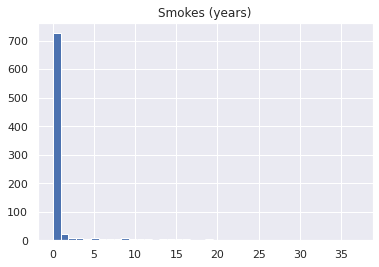

In [ ]:
df.hist("Smokes (years)",bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae1e98a50>]],
      dtype=object)

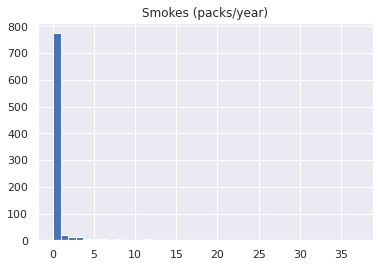

In [ ]:
df.hist("Smokes (packs/year)",bins=40)

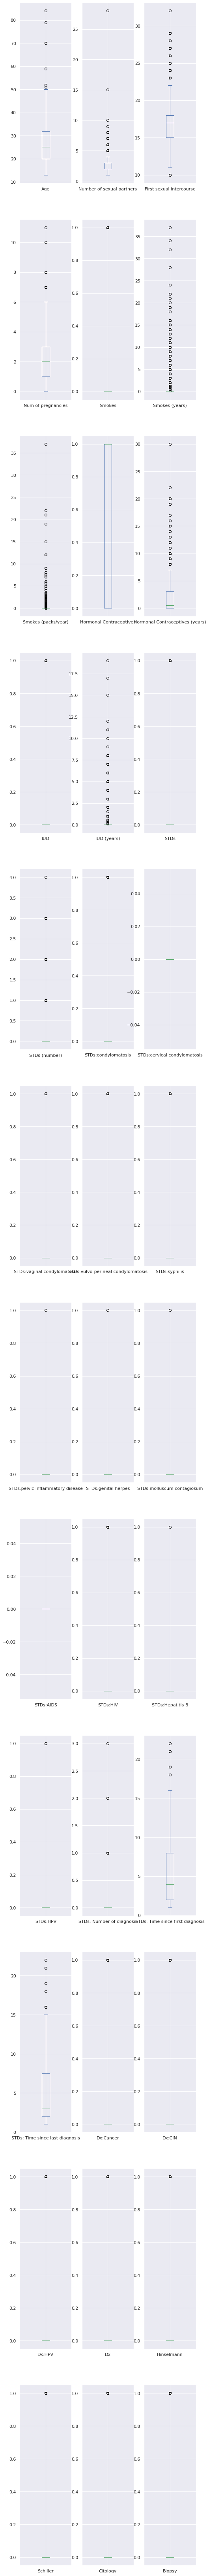

In [ ]:
df.plot(kind="box",  subplots=True, layout=(20,3),sharex=False, sharey=False, figsize=(8, 200))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae464c510>]],
      dtype=object)

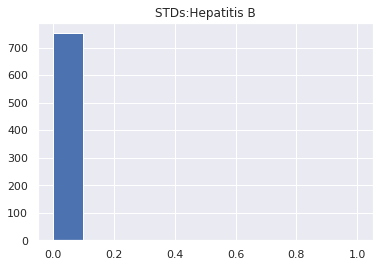

In [ ]:
df.hist("STDs:Hepatitis B")

In [ ]:
df["STDs (number)"].sum()

133.0

In [ ]:
# cleaning numerical columns with median
cleanlist =[1,2,3,5,6,8,10,12]
for i in cleanlist:
    df.iloc[:,i].fillna(df.iloc[:,i].median(),inplace=True)

In [ ]:
# cleaning STD Boolean columns with True (1)

cleanlist = np.arange(11,25)
for i in cleanlist:
    df.iloc[:,i].fillna(1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae512da50>]],
      dtype=object)

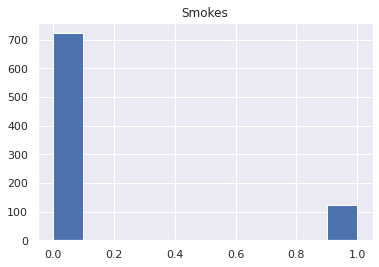

In [ ]:
df.hist("Smokes")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae5166f50>]],
      dtype=object)

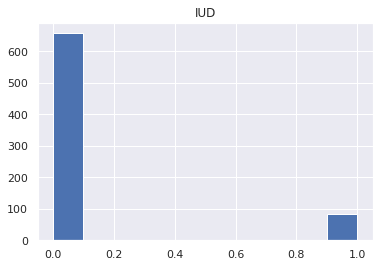

In [ ]:
df.hist("IUD")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae53cfcd0>]],
      dtype=object)

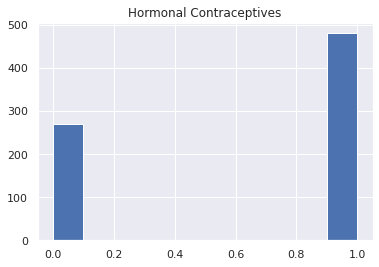

In [ ]:
df.hist("Hormonal Contraceptives")

In [ ]:
# Dealing with remaining Smokes, Hormonal Contraceptives, IUD replacing with mode

df["Smokes"].fillna(0,inplace=True)
df["Hormonal Contraceptives"].fillna(1,inplace=True)
df["IUD"].fillna(0,inplace=True)

In [ ]:
# Drop columns on STD Number of Diagnosis, time since last, first diagnosis

df=df.drop(['STDs: Number of diagnosis', 'STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)

In [ ]:
X=df.iloc[:,0:28]
y=df.iloc[:,32]

In [ ]:
X.shape

(858, 28)

In [ ]:
y.shape

(858,)

## **Correlation Heat Map**

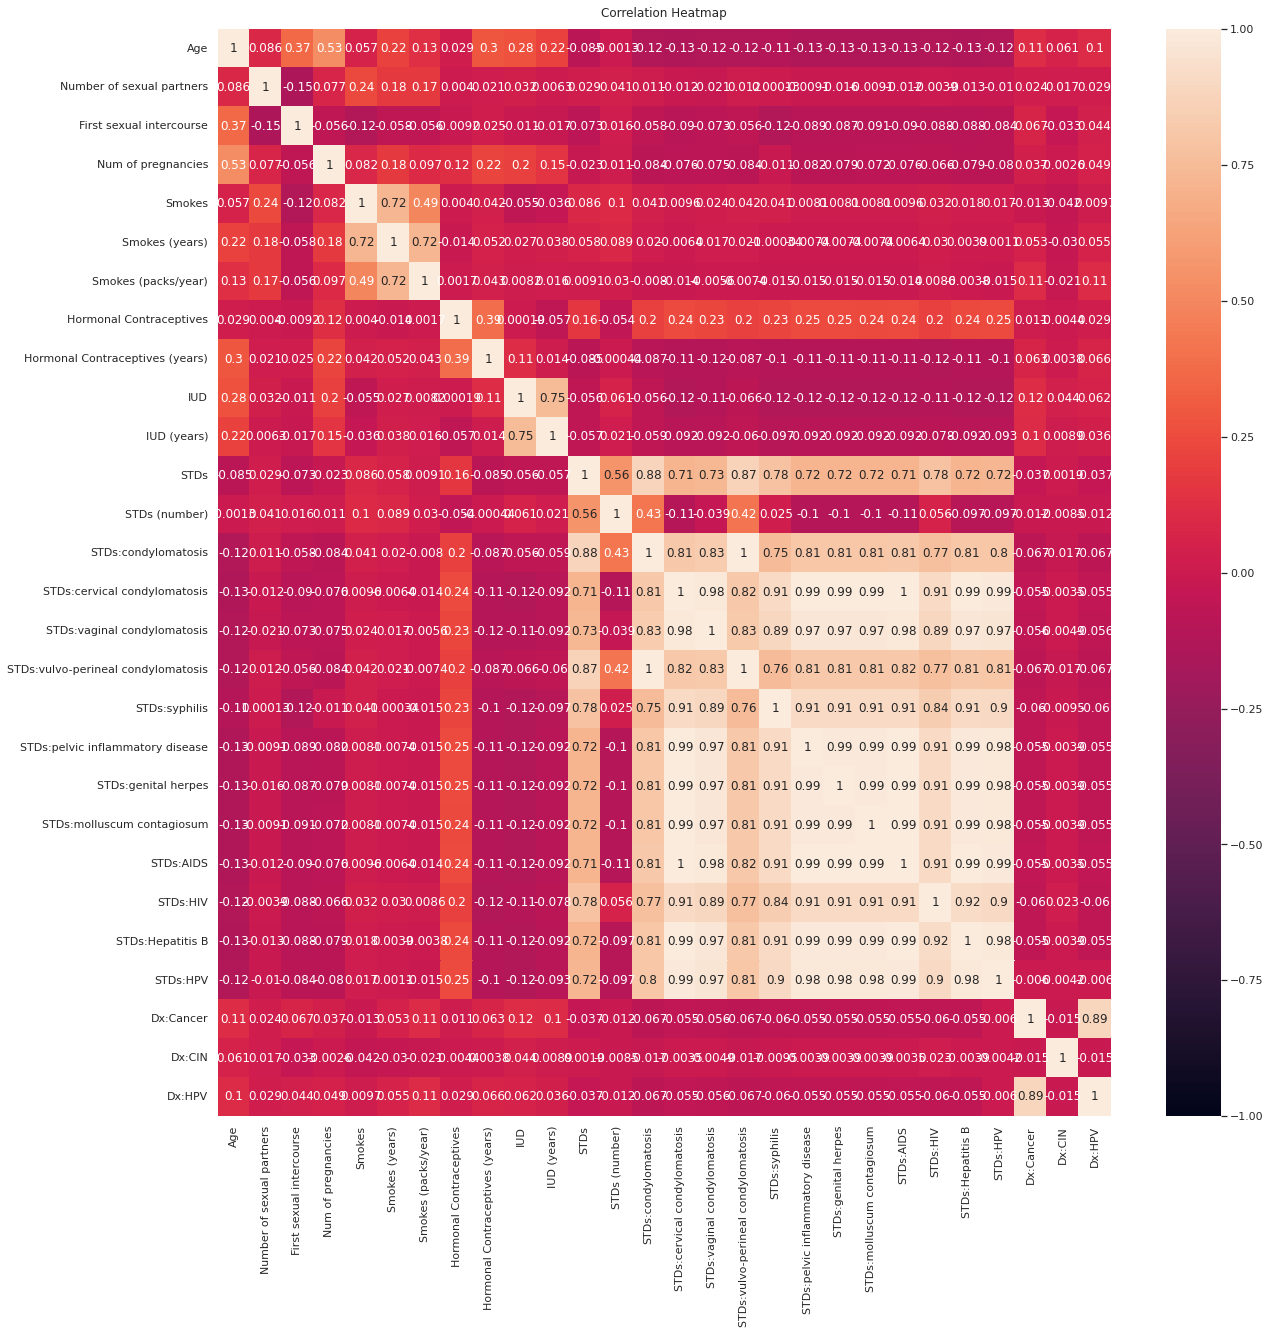

In [ ]:
# Correlation Heat Map

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,24.0,Age
1,3.4,Number of sexual partners
2,18.0,First sexual intercourse
3,5.6,Num of pregnancies
4,2.6,Smokes
5,4.0,Smokes (years)
6,2.3,Smokes (packs/year)
7,4.3,Hormonal Contraceptives
8,1.8,Hormonal Contraceptives (years)
9,2.8,IUD


In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Text(0, 0.5, 'cumulative explained variance')

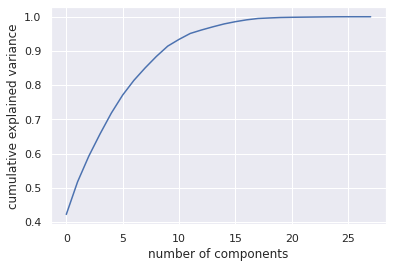

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (858, 28)
transformed shape: (858, 10)


In [ ]:
# Looking at the PCA components

for i in range(10):
    print("PCA Component",i,"Min:",round(X_pca[:,i].min(),2), "Max:",round(X_pca[:,i].max(),2))

PCA Component 0 Min: -2.06 Max: 9.21
PCA Component 1 Min: -1.99 Max: 16.48
PCA Component 2 Min: -5.29 Max: 7.45
PCA Component 3 Min: -6.03 Max: 8.65
PCA Component 4 Min: -3.42 Max: 6.51
PCA Component 5 Min: -4.58 Max: 5.96
PCA Component 6 Min: -4.94 Max: 5.13
PCA Component 7 Min: -1.99 Max: 9.0
PCA Component 8 Min: -5.77 Max: 7.82
PCA Component 9 Min: -3.47 Max: 9.56


In [ ]:
! pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 29.4 MB/s 
     |████████████████████████████████| 199 kB 54.5 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_pca, y = oversample.fit_resample(X_pca, y)

In [ ]:
# Split-out validation dataset

validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y,
test_size =validation_size, random_state=seed)

In [ ]:
# Test options and evaluation  metric
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.658860 (0.033361)
LDA: 0.651042 (0.036755)
KNN: 0.853567 (0.027047)
CART: 0.848886 (0.037154)
NB: 0.654966 (0.034168)
SVM: 0.817799 (0.029937)


### **KNeighbours Algorithm**

In [ ]:
# Make predictions on validation dataset
KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
predictions = KN.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.8322981366459627

Confusion matrix:
[[125  44]
 [ 10 143]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       169
           1       0.76      0.93      0.84       153

    accuracy                           0.83       322
   macro avg       0.85      0.84      0.83       322
weighted avg       0.85      0.83      0.83       322



### **Decision Tree Algorithm**

In [ ]:
# Make predictions on validation dataset
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
predictions = CART.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.8757763975155279

Confusion matrix:
[[150  19]
 [ 21 132]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       169
           1       0.87      0.86      0.87       153

    accuracy                           0.88       322
   macro avg       0.88      0.88      0.88       322
weighted avg       0.88      0.88      0.88       322



### **SVC Algorithm**

In [ ]:
# Make predictions on validation dataset
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.8291925465838509

Confusion matrix:
[[136  33]
 [ 22 131]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       169
           1       0.80      0.86      0.83       153

    accuracy                           0.83       322
   macro avg       0.83      0.83      0.83       322
weighted avg       0.83      0.83      0.83       322



### **Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
# RandomForestClassifier(n_estimators=100)
model = RandomForestClassifier()


#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predictions = model.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.9161490683229814

Confusion matrix:
[[155  14]
 [ 13 140]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       169
           1       0.91      0.92      0.91       153

    accuracy                           0.92       322
   macro avg       0.92      0.92      0.92       322
weighted avg       0.92      0.92      0.92       322



In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


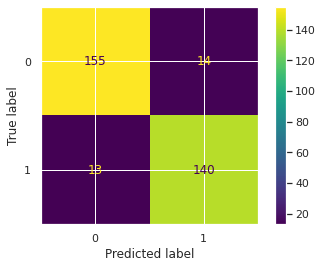

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

### **Gradient Boosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.1, 
                                              n_estimators=120,
                                              max_depth=10)

model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=120)

In [ ]:
predictions = model.predict(X_test)
print('Accuracy:')
print(accuracy_score(y_test, predictions))
print()
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions)) #result is rows: prediction,col: actual 
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Accuracy:
0.9192546583850931

Confusion matrix:
[[156  13]
 [ 13 140]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       169
           1       0.92      0.92      0.92       153

    accuracy                           0.92       322
   macro avg       0.92      0.92      0.92       322
weighted avg       0.92      0.92      0.92       322



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


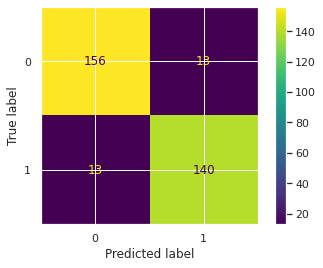

In [ ]:
plot_confusion_matrix(model,X_test,y_test)